In [412]:
#import libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import radviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.utils.validation import column_or_1d


In [ ]:
#predictive model to determine the likelihood of a heart attack, with a specific focus on understanding how age influences this risk.

In [413]:
os.listdir("/Users/Administrator/Downloads/A python")

['A python - Shortcut.lnk',
 'fifadataone.csv',
 'Heartdataforanalysis.csv',
 'o2Saturation.xls',
 'r for fifa.R',
 'tableau alex dat',
 'vgsales.csv']

In [414]:
#read the dataset
heart= pd.read_csv('/Users/Administrator/Downloads/A python/Heartdataforanalysis.csv')

In [ ]:
#explaining Terms for better understanding 

#cp=constrictive pericarditis(chest paint), membrane holding  the heart, becoming thicker and stiffer than normal,affecting heart's pumping ability, potentially leading to serious issues like heart failure.

#[trtbps= tested blood pressure when at rest  (in mm Hg).
#NORMAL--LESS THAN 120(SYSTOLIC)||LESS THAN 80(DIASTOLIC)
#ELEVATED --120 – 129(SYSTOLIC) ||LESS THAN 80(DIASTOLIC)
#HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 1 --130 – 139(SYSTOLIC) ||80 – 89(DIASTOLIC)
#HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 2--140 OR HIGHER(SYSTOLIC)||90 OR HIGHER(DIASTOLIC)
#HYPERTENSIVE CRISIS (consult your doctor immediately)--HIGHER THAN 180(SYSTOLIC) ||HIGHER THAN 120(DIASTOLIC)]

#chol=The amount of cholestoral (mg/dl)
#250 and higer(Dangerous)|| (At risk )200 to 239||under 200(healthy) for total cholestoral

#fbs= amount of fasting blood sugar(mg/dl)
#Value 1 :> 120, Value 0 :<=120

#restecg= Electrocardiographic at rest|| Value 0: normal|| Value 1: abnormal ST-T wave abnormal||
#Value 2: according to Estes' criteria, probably or definitely have left ventricularhypertrophy

#thalachh= Maximum value of the heart rate
#Age range (years)--Average resting heart rate (bpm)|| 18 to 20 = 81.6|| 21 to 30=80.2||31 to 40=78.5||41 to 50=75.3
#51 to 60=73.9||61 to 70=73.0||71 to 80=74.2||Over 80=78.1

#exng= Exercise angina pectoris (type of chest pain caused by reduced blood flow to the heart) Value 1: have ||Value 0: no

#oldpeak=ST depression (This is a test that measures the electrical activity in a person’s heart.)


#slp=(Speech-language pathologists (SLPs) are commonly involved in the rehabilitation of patients with cardiopulmonary disorders.)



#caa =number of major vessel

#thall =thalassemia(inherited blood disorder that causes your body to have less hemoglobin than normal)



#output


In [415]:
heart.head(13)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [416]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [417]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [418]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [259]:
#checking for empty column in the dataset
heart.isnull().any()

age                                     False
sex                                     False
chest_pain                              False
resting_blood_presure                   False
cholestoral                             False
fasting_blood_sugar                     False
resting_electrocardiographic_results    False
maximum_heart_rate                      False
exercise-induced_angina                 False
oldpeak                                 False
slope                                   False
number_of_colored_vessels               False
thalassemia                             False
output                                  False
dtype: bool

In [280]:

heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [410]:
heart.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group,agee
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61+,63
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-45,37
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,31-45,41
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,46-60,56
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,46-60,57
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,46-60,57
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,46-60,56
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,31-45,44
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,46-60,52
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,46-60,57


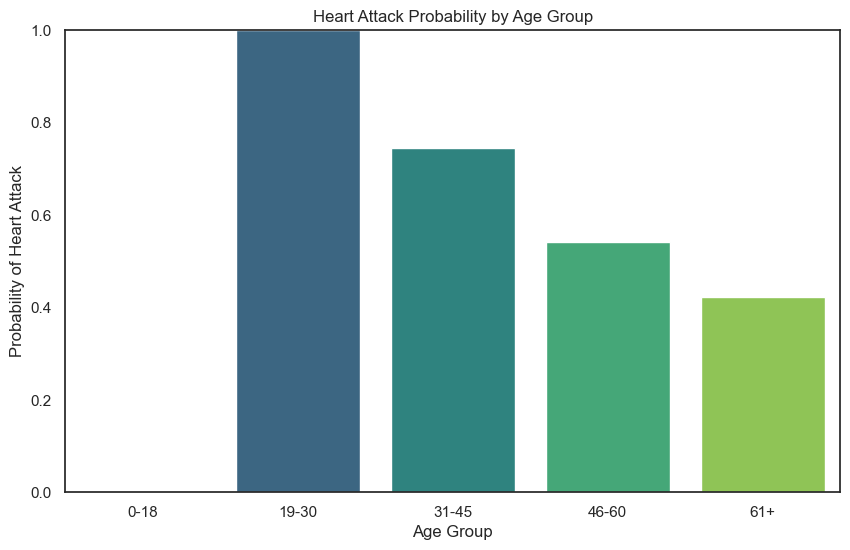

In [419]:
bins = [0,18, 30, 45, 60, np.inf]
# Create age labels
labels = ['0-18','19-30', '31-45', '46-60', '61+']
# Create age groups
heart['age_group'] = pd.cut(heart['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate the mean output (probability of heart attack)
age_grouped = heart.groupby('age_group')['output'].mean().reset_index()
#visualizng
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='output', data=age_grouped, palette='viridis')

# Add titles and labels
plt.title('Heart Attack Probability by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Probability of Heart Attack')
plt.ylim(0, 1)  # Since probability ranges from 0 to 1

# Show plot
plt.show()
    
    

In [431]:
columnscorr=heart[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa','thall','output']]

In [468]:
#correlation to check columns of the dataset
columnscorr.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


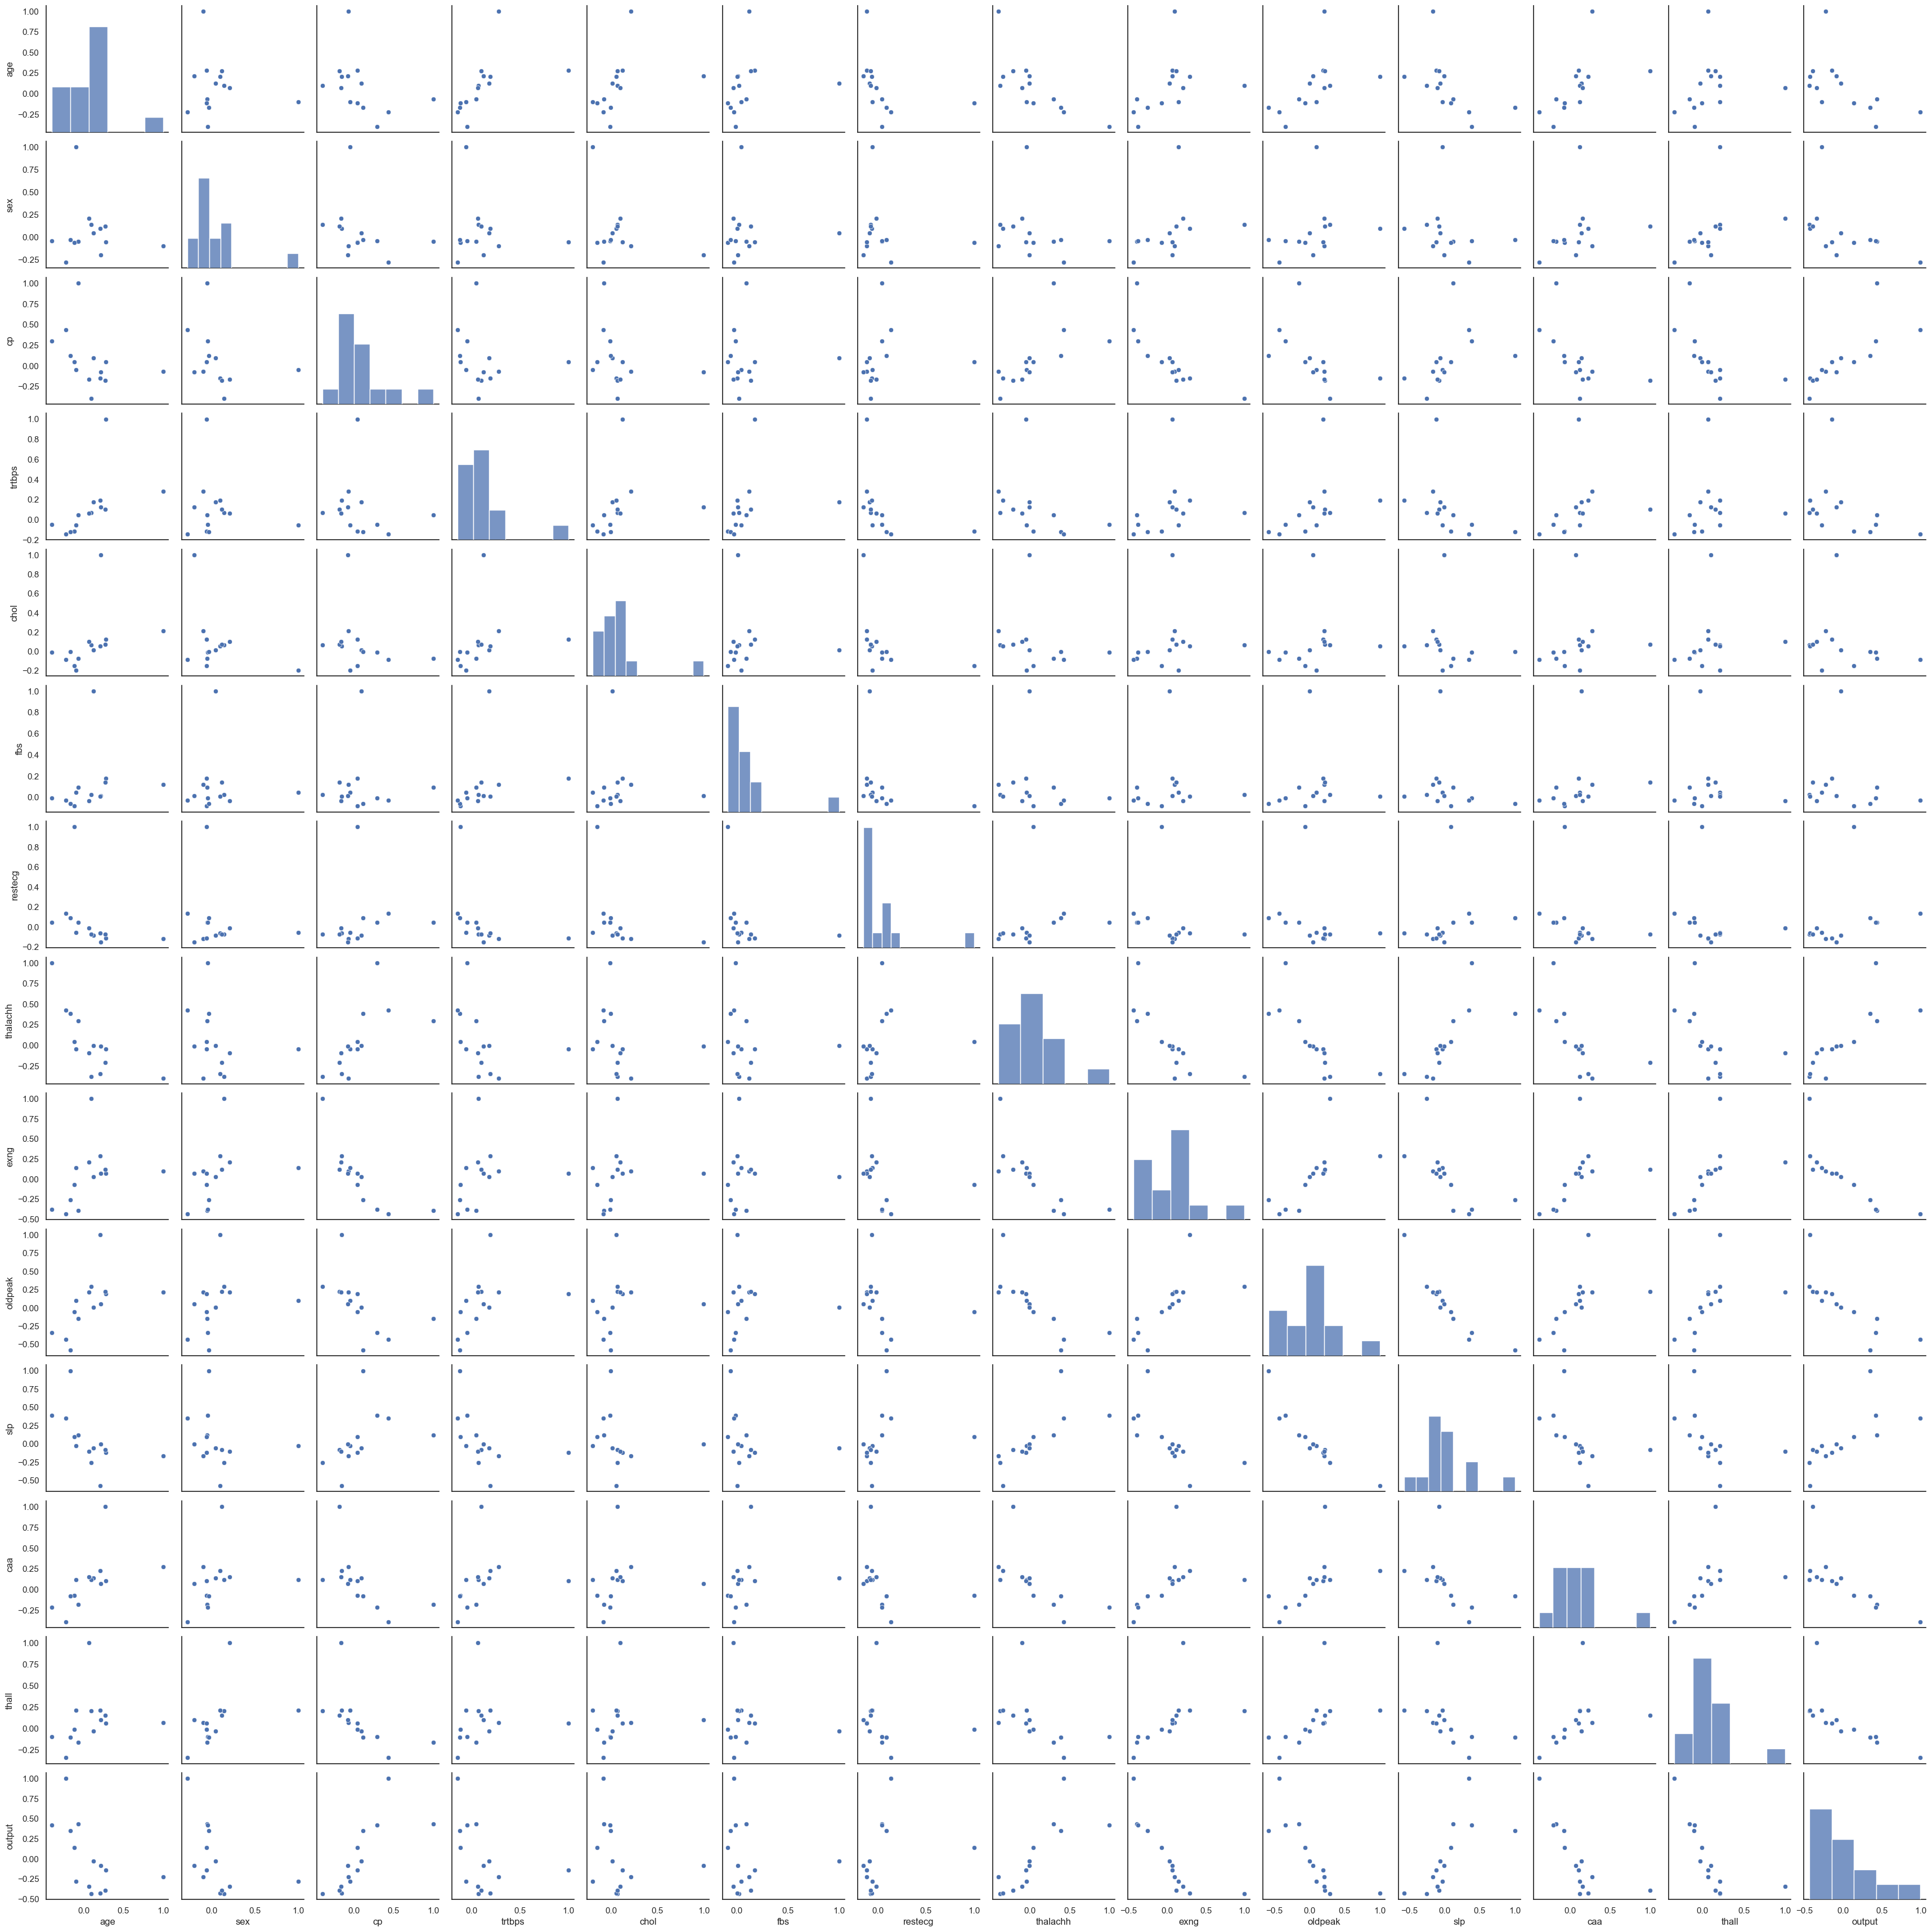

In [433]:
#ploting pairplot to view the correlated data
sns.pairplot(columnscorr.corr())

<Axes: >

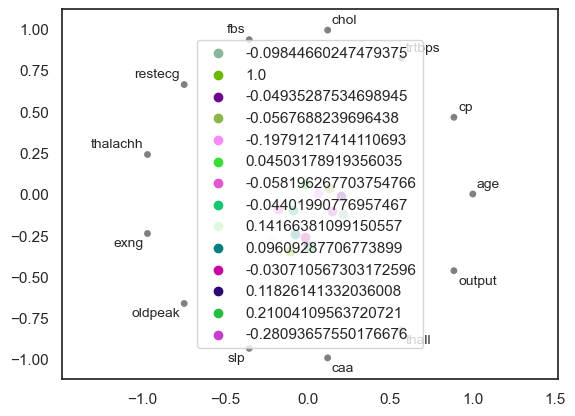

In [435]:
rad =pd.plotting.radviz(columnscorr.corr(),'sex')
rad

In [ ]:
#correlations between "age" and other attributes, showing regression 

In [421]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61+
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-45
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,31-45
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,46-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,46-60


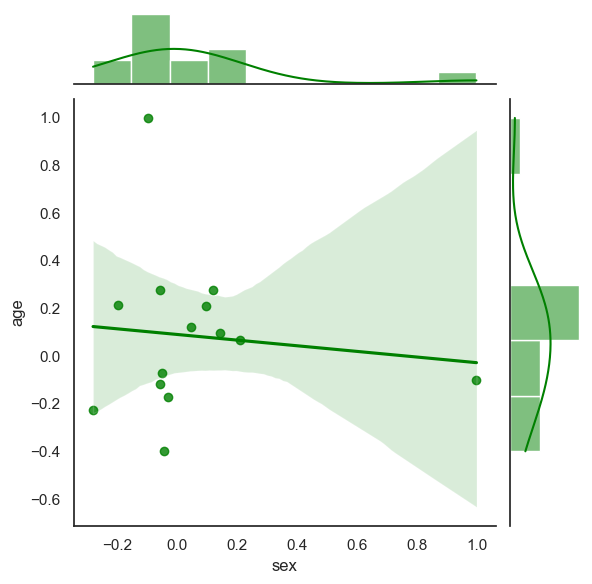

In [436]:
#sex against age
sns.jointplot(y='age', x='sex', data=columnscorr.corr(), kind='reg',color='green')

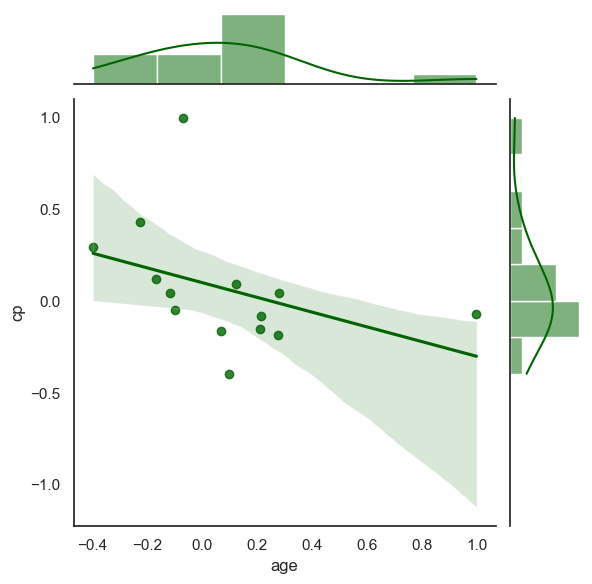

In [437]:

sns.jointplot(x='age', y='cp', data=columnscorr.corr(), kind='reg',color='darkgreen')

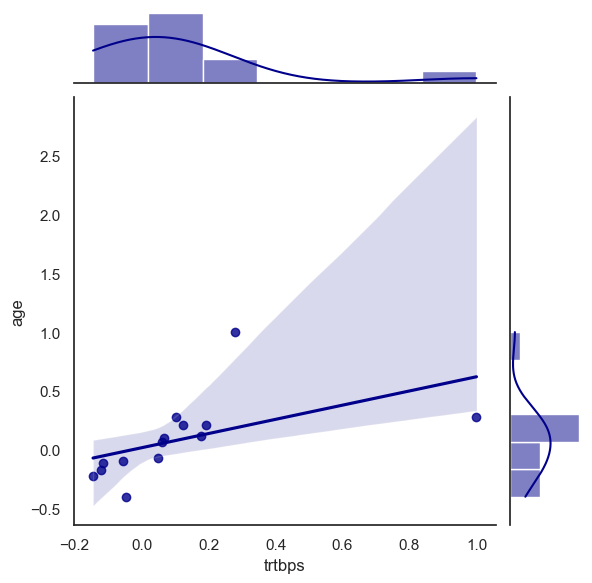

In [434]:
sns.jointplot(y='age', x='trtbps', data=columnscorr.corr(), kind='reg',color='darkblue')

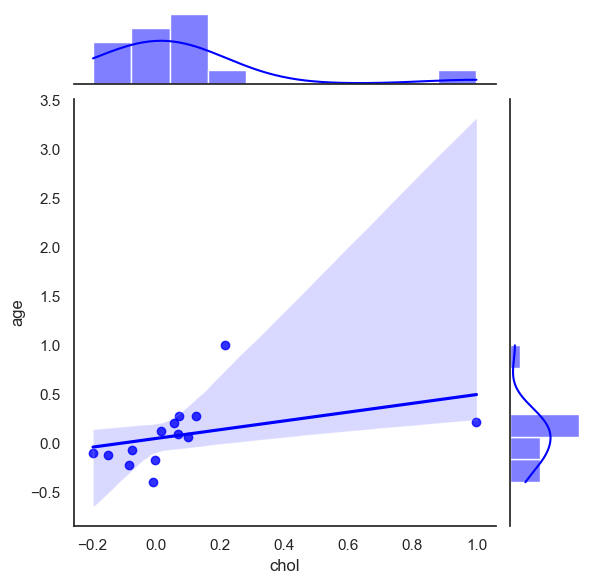

In [438]:
sns.jointplot(y='age', x='chol', data=columnscorr.corr(), kind='reg',color='blue')

In [ ]:
sns.jointplot(y='age', x='restecg', data=columnscorr.corr(), kind='reg',color='black')

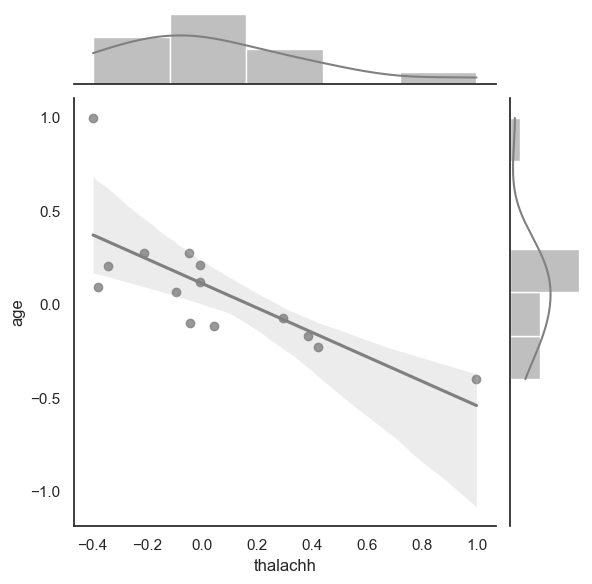

In [439]:
sns.jointplot(y='age', x='thalachh', data=columnscorr.corr(), kind='reg',color='grey')

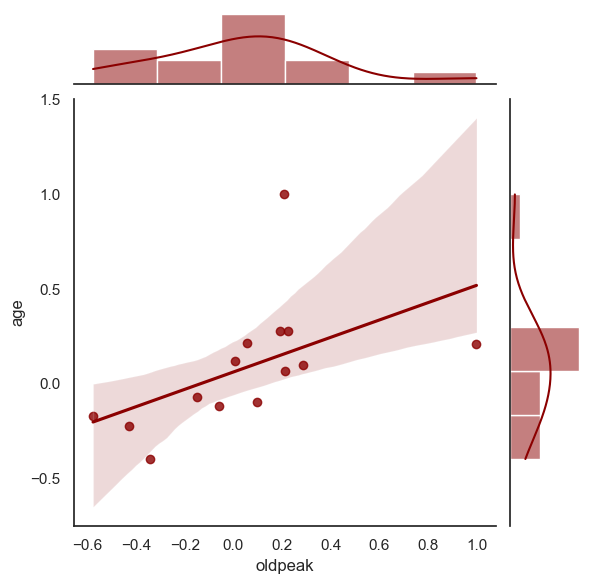

In [440]:
sns.jointplot(y='age', x='oldpeak', data=columnscorr.corr(), kind='reg',color='darkred')

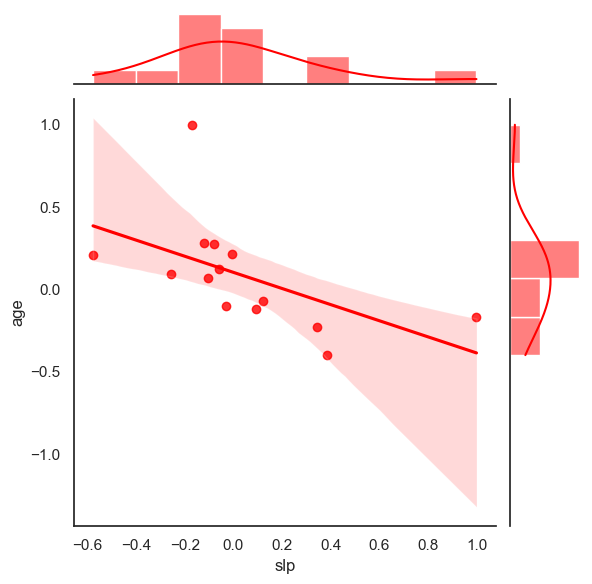

In [441]:
sns.jointplot(y='age', x='slp', data=columnscorr.corr(), kind='reg',color='red')

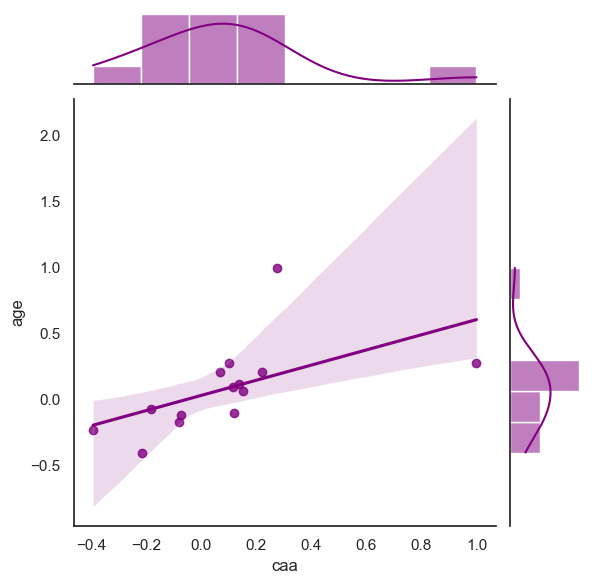

In [442]:
sns.jointplot(y='age', x='caa', data=columnscorr.corr(), kind='reg',color='purple')

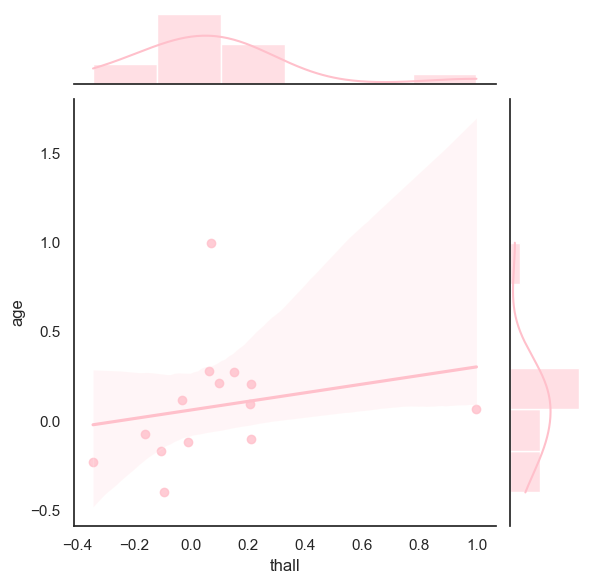

In [443]:
sns.jointplot(y='age', x ='thall', data=columnscorr.corr(), kind='reg',color='pink')

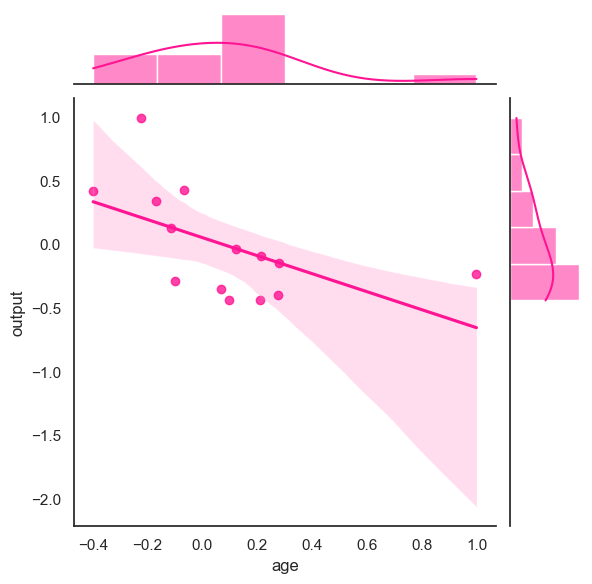

In [444]:
sns.jointplot(x='age', y='output', data=columnscorr.corr(), kind='reg',color='deeppink',)

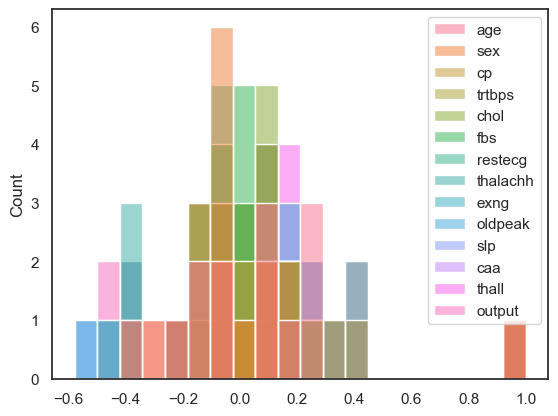

In [445]:
sns.histplot(columnscorr.corr())
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5276\495609650.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(columnscorr.corr(),hist=False,)


<function matplotlib.pyplot.show(close=None, block=None)>

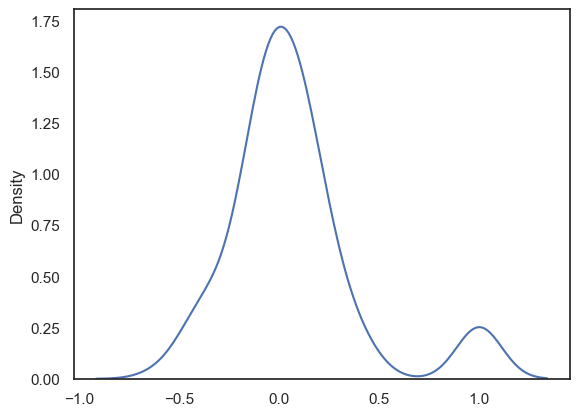

In [449]:
 #density plot for the correlated dataset  
sns.distplot(columnscorr.corr(),hist=False,)
plt.show


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5276\2110945877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(columnscorr,hist=False,)


<function matplotlib.pyplot.show(close=None, block=None)>

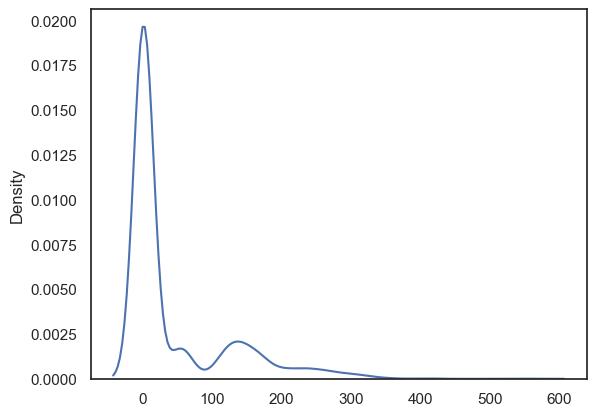

In [450]:
 #distrity plot for the dataset(not correlated)
sns.distplot(columnscorr,hist=False,)
plt.show
 

In [451]:
#creating numerical list
numerical_values= heart[["age", "trtbps","chol","thalachh","oldpeak"]]

<Axes: >

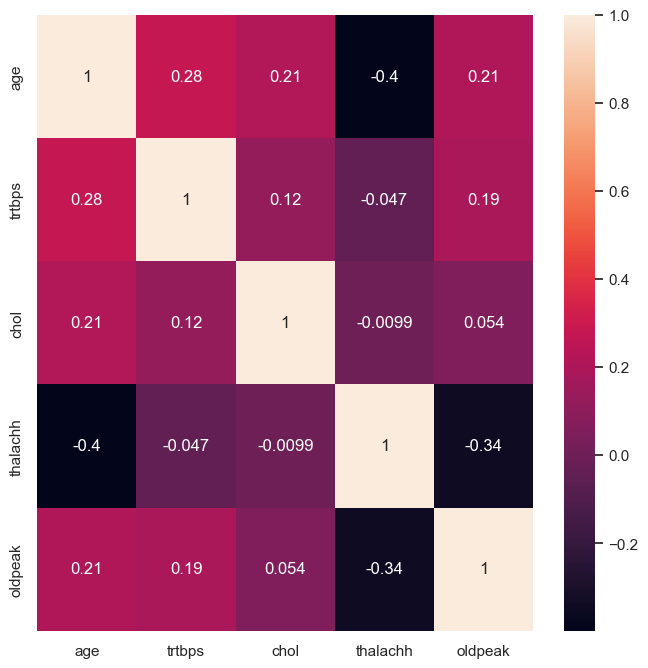

In [452]:
#using heatmap for numerical values correlation 
figure = plt.figure(figsize = (8,8))
sns.heatmap(numerical_values.corr(), annot = True )

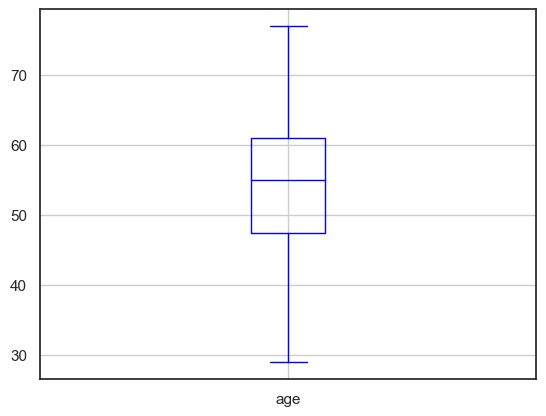

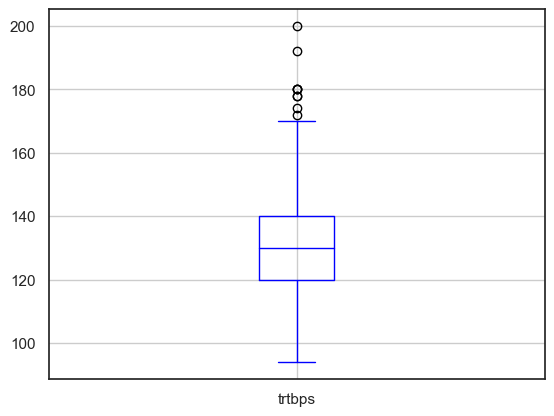

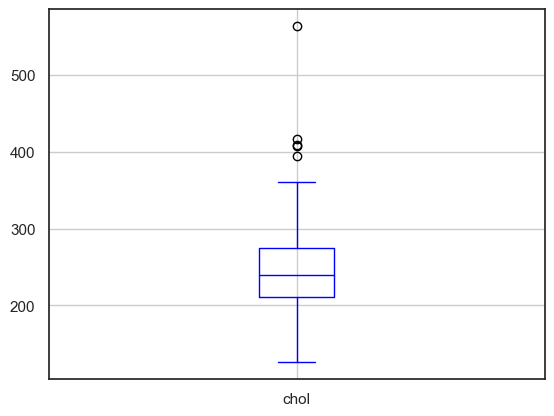

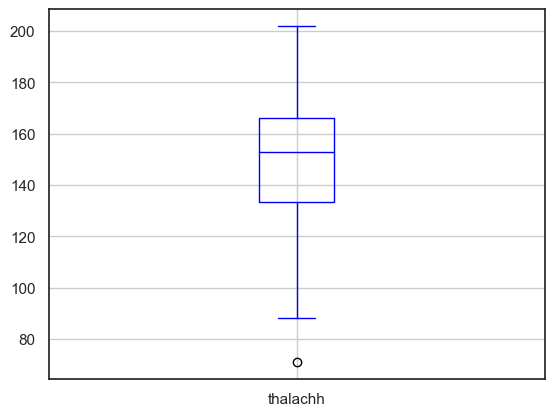

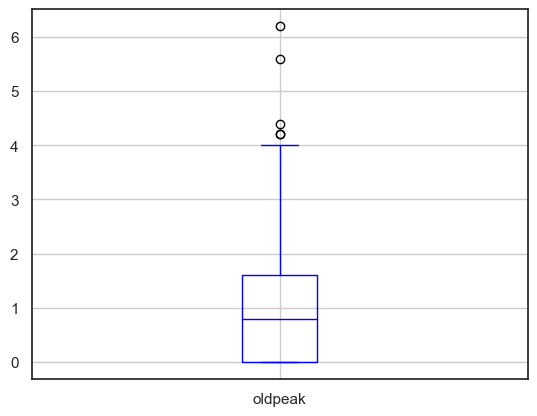

In [454]:
# box plot to check for outlier in  columnn, we notice trbps has the highest outlier
for column in numerical_values:
    plt.figure()
    numerical_values.boxplot([column], color="blue")

In [166]:
#standardization  
scaler = StandardScaler()
scaler

StandardScaler()

In [172]:
numerical_valuess= ["age", "trtbps","chol","thalachh","oldpeak"]

In [182]:
scaled_array = scaler.fit_transform(heart[numerical_valuess])
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [188]:
#converting to dataframe
scaleddata = pd.DataFrame(scaled_array,columns=numerical_valuess)

In [193]:
#adding output column
scaleddataa = pd.concat([scaleddata,heart.loc[:,"output"]],axis=1)  

In [194]:
scaleddataa.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [199]:
#converting from wide format  to long format
scaleddataa_melted = pd.melt(scaleddataa, id_vars = "output", var_name = "attributes", value_name = "value")
scaleddataa_melted.head()

,output,attributes,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464


In [203]:
scaleddataa_melted.tail()

,output,attributes,value
1510,0,oldpeak,-0.724323
1511,0,oldpeak,0.138373
1512,0,oldpeak,2.036303
1513,0,oldpeak,0.138373
1514,0,oldpeak,-0.896862


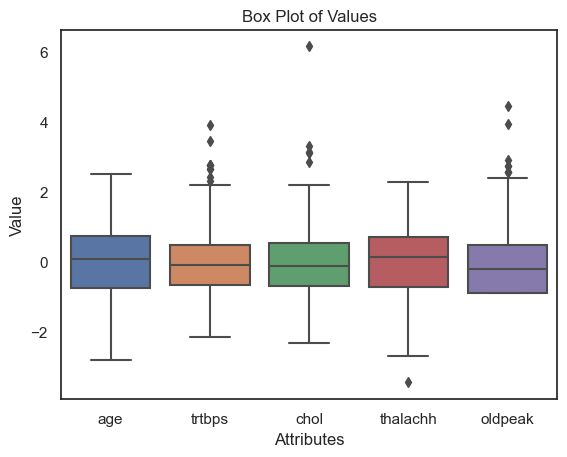

In [458]:
#visualization of scaleddataa_melted data,showing outliers
sns.boxplot(x='attributes', y='value', data=scaleddataa_melted)
plt.title('Box Plot of Values')
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

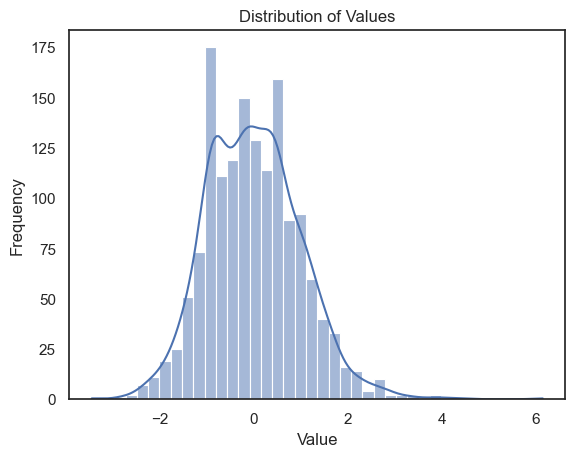

In [460]:
 #Histogram showing frequent value
sns.histplot(scaleddataa_melted['value'], kde=True,"")
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

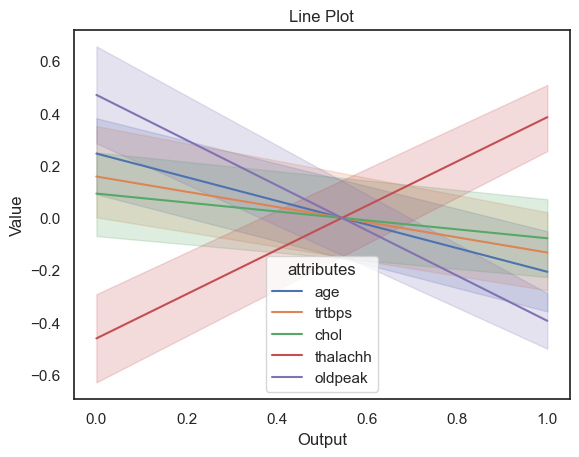

In [462]:
sns.lineplot(data=scaleddataa_melted, x='output', y='value', hue='attributes')
plt.title('Line Plot')
plt.xlabel('Output')
plt.ylabel('Value')
plt.show()


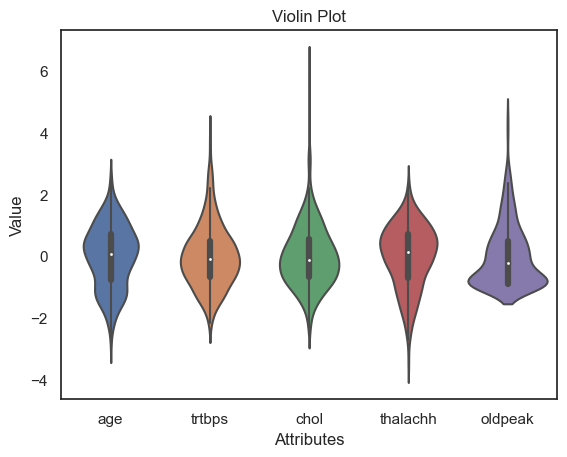

In [463]:
# Violin Plot density of the data points at the values.
sns.violinplot(x='attributes', y='value', data=scaleddataa_melted)
plt.title('Violin Plot')
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

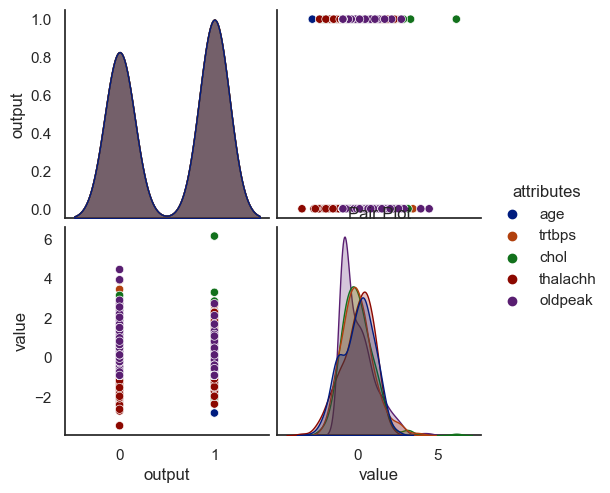

In [464]:
sns.pairplot(scaleddataa_melted, hue='attributes', palette='dark')
plt.title('Pair Plot')
plt.show()

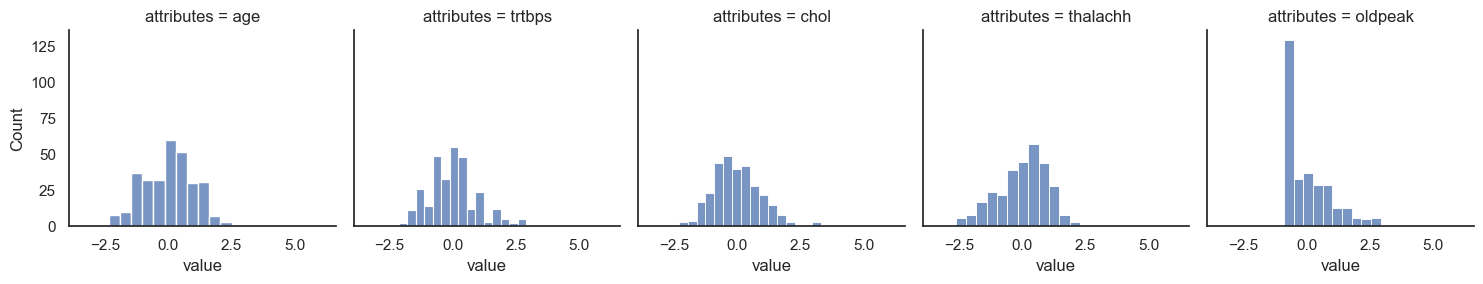

In [465]:
# Facet Grid
g = sns.FacetGrid(scaleddataa_melted, col="attributes", palette='colorblind')
g.map(sns.histplot, "value")
plt.show()

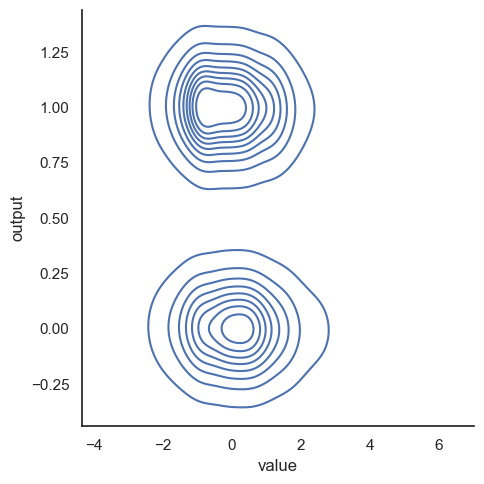

In [222]:
sns.displot(data=scaleddataa_melted, x="value",y="output", kind="kde")

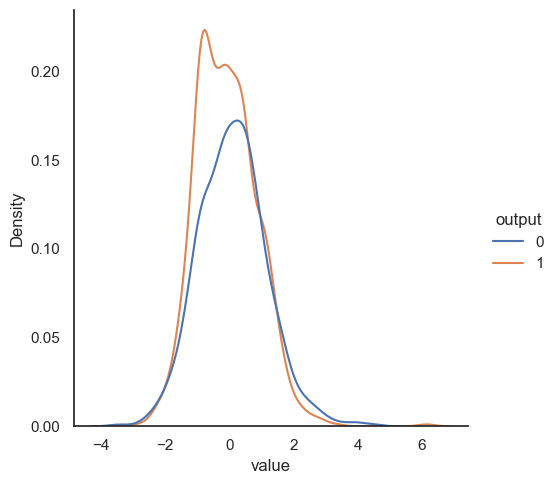

In [225]:
sns.displot(data=scaleddataa_melted, x="value", hue="output", kind="kde")

In [470]:
# creating categorical list
cegorical_list=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


In [368]:

heart1 = heart.copy()

heart1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [370]:
#converting categorical list  into dummy/indicator variables.

heart1= pd.get_dummies(heart1, columns = cegorical_list[:-1], drop_first = True)
heart1.head()



,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [400]:
X = heart1.drop(["output"], axis = 1)
y = heart1[["output"]]

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                   )

In [472]:
logisticr=LogisticRegression(max_iter=1000)
logisticr


LogisticRegression(max_iter=1000)

In [474]:
logisticr.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [476]:
y_pred = logisticr.predict(X_test)

In [477]:
conf_matrix = confusion_matrix(y_test, y_pred)


In [478]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8852459016393442
Confusion Matrix:
[[27  2]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



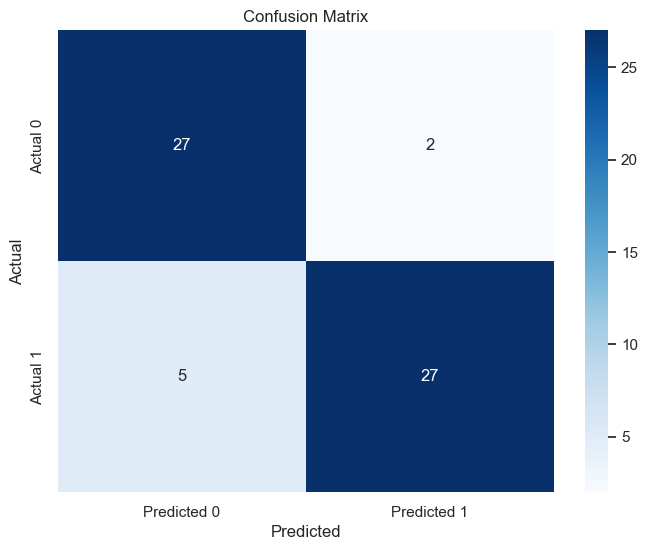

In [396]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

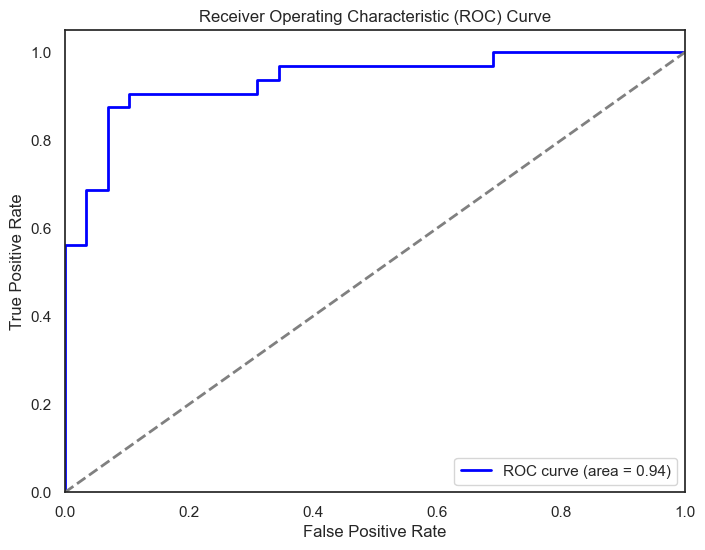

In [383]:
#ROC curve
y_pred_prob =logisticr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
